In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# combined_results.csv is a csv data which includes fault injection for 1000 ber values from 10E-10 to 10E-2
mlp_data = pd.read_csv('combined_results.csv')

In [ ]:
#lstm_data.head()
mlp_data.head()

In [66]:
lstm_data.head()

,accuracy_before,classification_error_before,accuracy_after,classification_error_after,classification_error_induced,error_rate,config
0,0.78176,0.21824,0.55864,0.44136,0.22312,0.028649,signed-bitmask-2-6
1,0.81348,0.18652,0.70848,0.29152,0.10500,0.028649,afloat-bitmask-2-6
2,0.81512,0.18488,0.67928,0.32072,0.13584,0.028649,signed-dense-2-6
3,0.80836,0.19164,0.56576,0.43424,0.24260,0.028649,afloat-dense-2-6
4,0.80992,0.19008,0.71112,0.28888,0.09880,0.029369,signed-bitmask-2-6


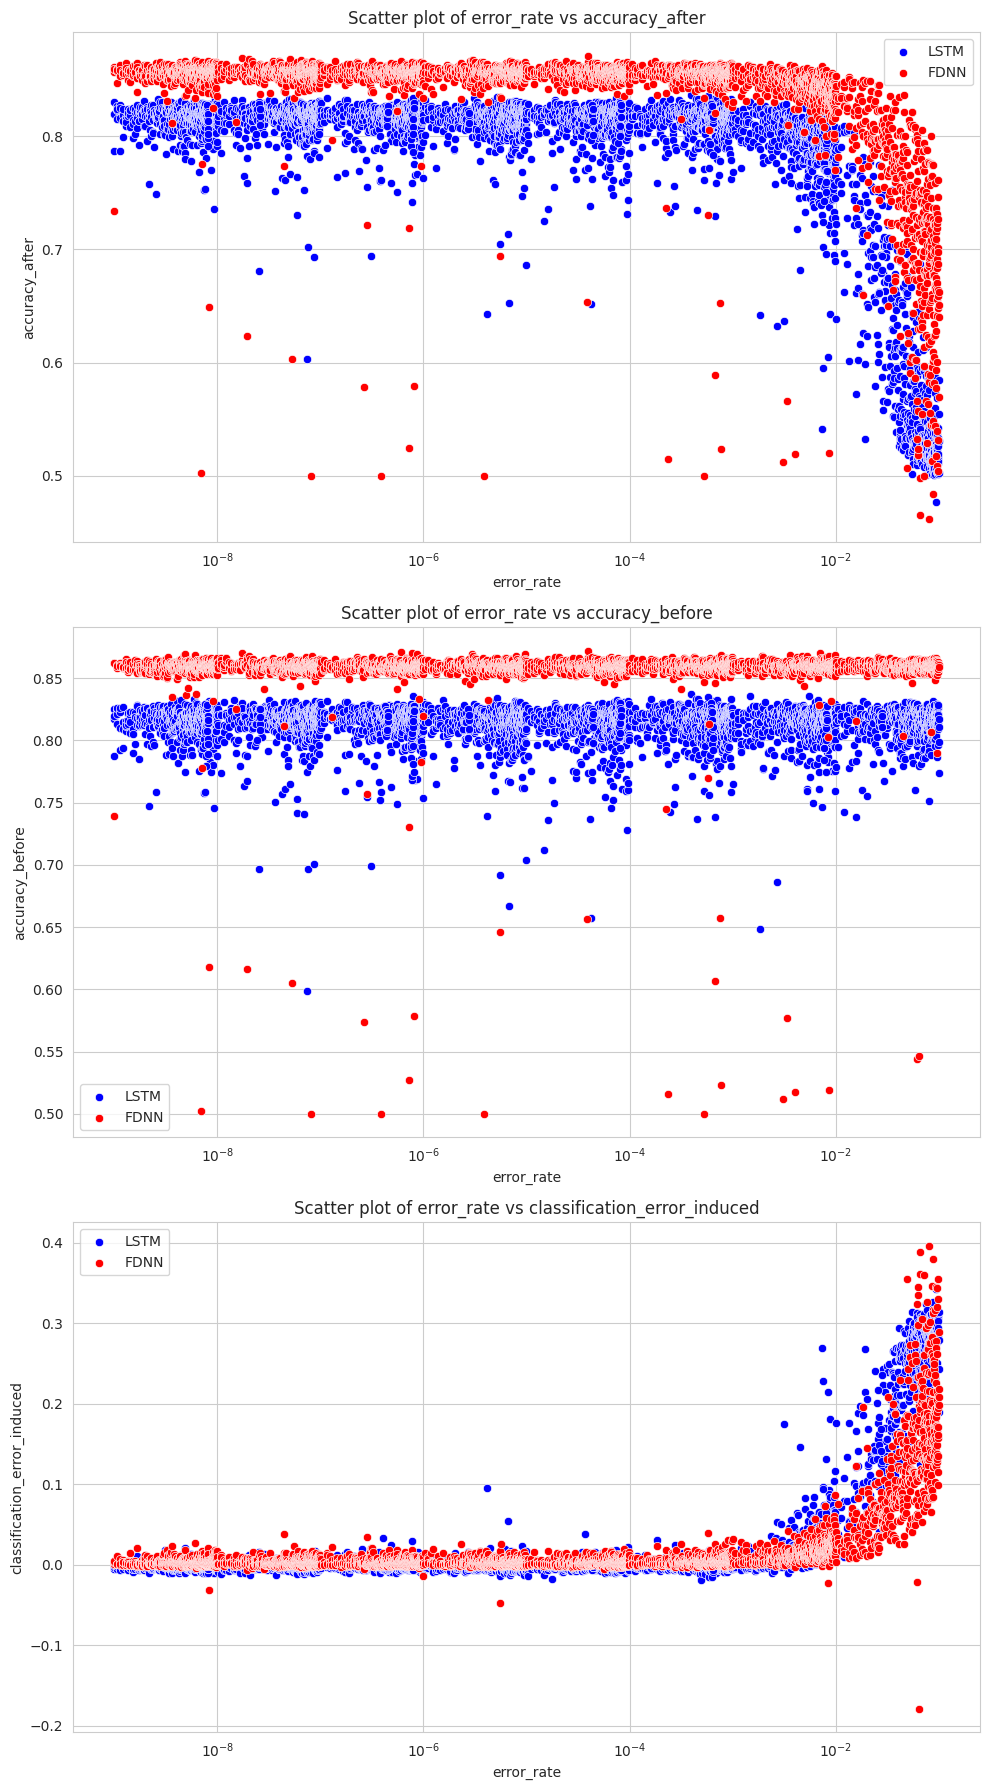

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load data for LSTM model from LSTM_results_combined.csv
lstm_data = pd.read_csv('LSTM_results_combined.csv')

# Load data for FDNN model from FDNN_results_combined.csv
mlp_data = pd.read_csv('combined_results.csv')

# Set the style of the plots
sns.set_style("whitegrid")

# Create the figure and the axes
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot error_rate vs accuracy_after for LSTM
sns.scatterplot(data=lstm_data, x='error_rate', y='accuracy_after', ax=axs[0], color='blue', label='LSTM')
axs[0].set_xscale('log')
axs[0].set_title('Scatter plot of error_rate vs accuracy_after')

# Plot error_rate vs accuracy_after for FDNN
sns.scatterplot(data=mlp_data, x='error_rate', y='accuracy_after', ax=axs[0], color='red', label='FDNN')
axs[0].set_xscale('log')

# Plot error_rate vs accuracy_before for LSTM
sns.scatterplot(data=lstm_data, x='error_rate', y='accuracy_before', ax=axs[1], color='blue', label='LSTM')
axs[1].set_xscale('log')
axs[1].set_title('Scatter plot of error_rate vs accuracy_before')

# Plot error_rate vs accuracy_before for FDNN
sns.scatterplot(data=mlp_data, x='error_rate', y='accuracy_before', ax=axs[1], color='red', label='FDNN')
axs[1].set_xscale('log')

# Plot error_rate vs classification_error_induced for LSTM
sns.scatterplot(data=lstm_data, x='error_rate', y='classification_error_induced', ax=axs[2], color='blue', label='LSTM')
axs[2].set_xscale('log')
axs[2].set_title('Scatter plot of error_rate vs classification_error_induced')

# Plot error_rate vs classification_error_induced for FDNN
sns.scatterplot(data=mlp_data, x='error_rate', y='classification_error_induced', ax=axs[2], color='red', label='FDNN')
axs[2].set_xscale('log')

# Set legend
axs[0].legend()
axs[1].legend()
axs[2].legend()

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from statsmodels.nonparametric.smoothers_lowess import lowess

plt.figure(figsize=(10, 6))

# Define the color palette for the four config values
palette = sns.color_palette('Set1', n_colors=len(unique_config_values))

for i, config_value in enumerate(unique_config_values):
    # Filter the data for the current config value
    filtered_data = data[data['config'] == config_value]
    
    # Sort the data by error_rate for plotting
    filtered_data = filtered_data.sort_values(by='error_rate')
    
    # Apply the lowess smoother
    lowess_results = lowess(filtered_data['accuracy_after'], np.log(filtered_data['error_rate']))
    
    # Plot the smoothed data
    plt.plot(np.exp(lowess_results[:, 0]), lowess_results[:, 1], label=config_value, color=palette[i])

plt.xscale('log')
plt.title('Smoothed Accuracy After vs. Error Rate for Different Configurations')
plt.xlabel('Error Rate (log scale)')
plt.ylabel('Smoothed Accuracy After')
plt.legend(title='Config')
plt.show()

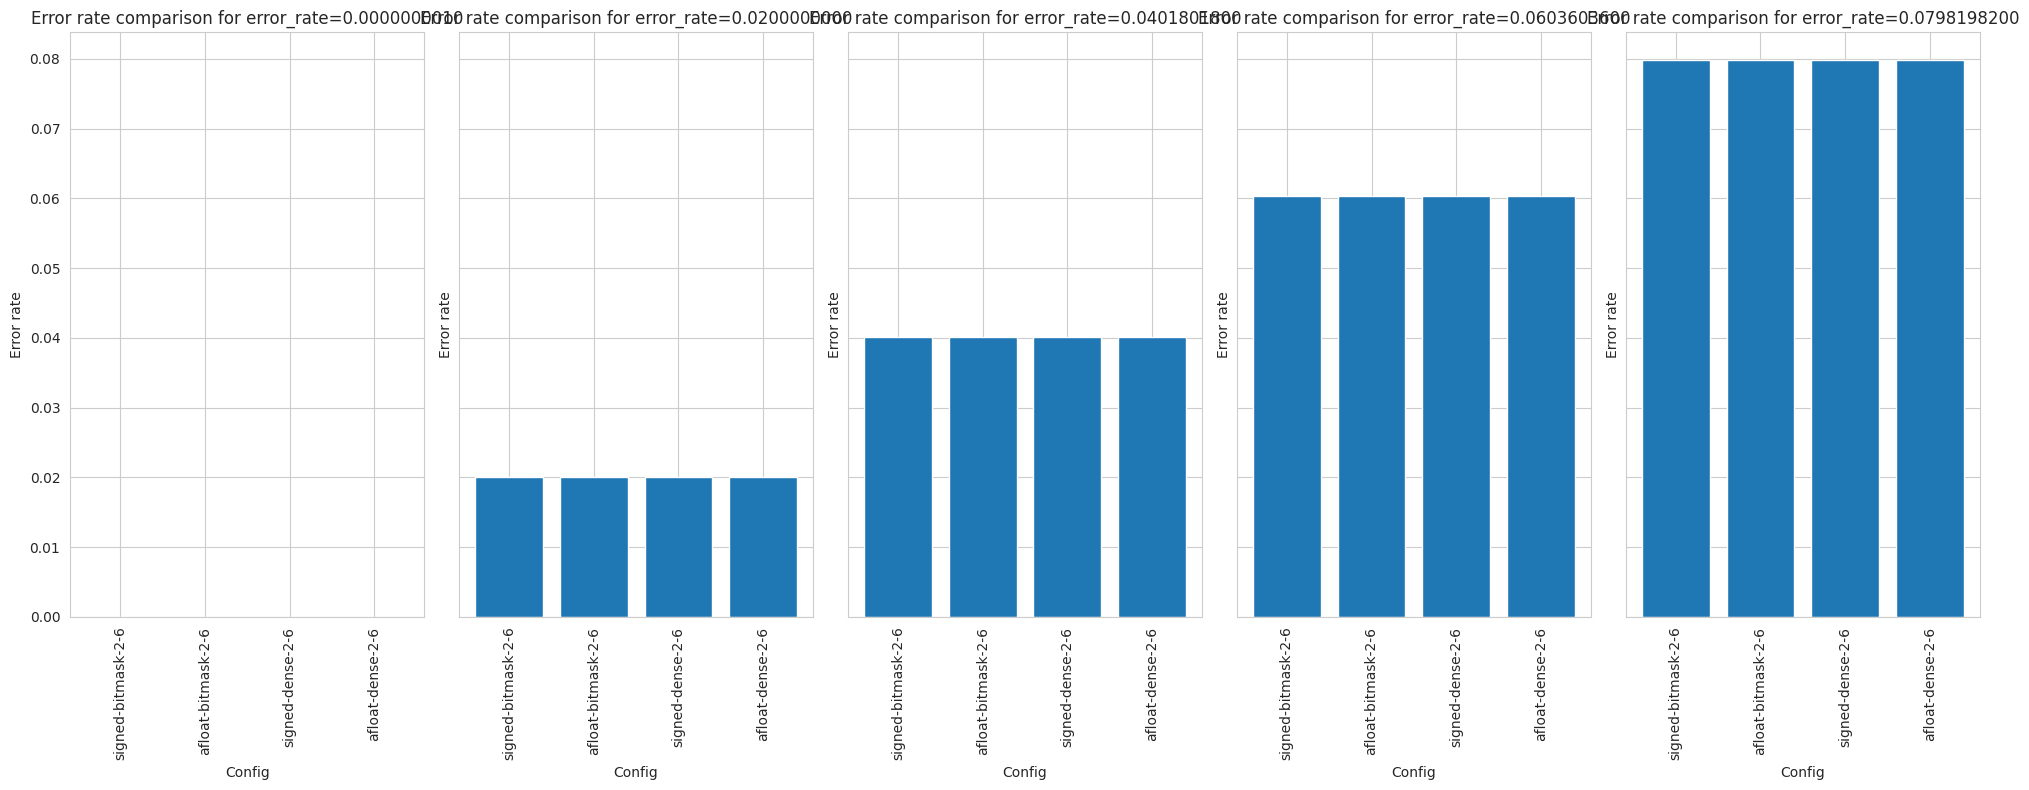

In [22]:
# Get the maximum and minimum error_rate values
max_error_rate = data['error_rate'].max()
min_error_rate = data['error_rate'].min()

# Calculate the interval size
interval_size = (max_error_rate - min_error_rate) / 5

# Generate five equally spaced values within the range of error_rate values
selected_error_rates = np.arange(min_error_rate, max_error_rate, interval_size)[:5]

# Find the indices of the rows that have the closest error_rate values to the selected error_rates
indices = np.abs(data['error_rate'].values[:, None] - selected_error_rates).argmin(axis=0)

# Select the rows from the data
selected_data = data.iloc[indices]

# Create the figure and the axes
fig, axs = plt.subplots(1, 5, figsize=(20, 8), sharey=True)  # Set sharey=True to share the y-axis

# For each selected error_rate
for i, (idx, row) in enumerate(selected_data.iterrows()):
    # Select the data for the current error_rate
    current_data = data[data['error_rate'] == row['error_rate']]

    # Create a bar chart to compare error_rate of DNN with different settings
    axs[i].bar(current_data['config'], current_data['error_rate'])
    axs[i].set_title(f'Error rate comparison for error_rate={row["error_rate"]:.10f}')
    axs[i].set_xlabel('Config')
    axs[i].set_ylabel('Error rate')
    axs[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

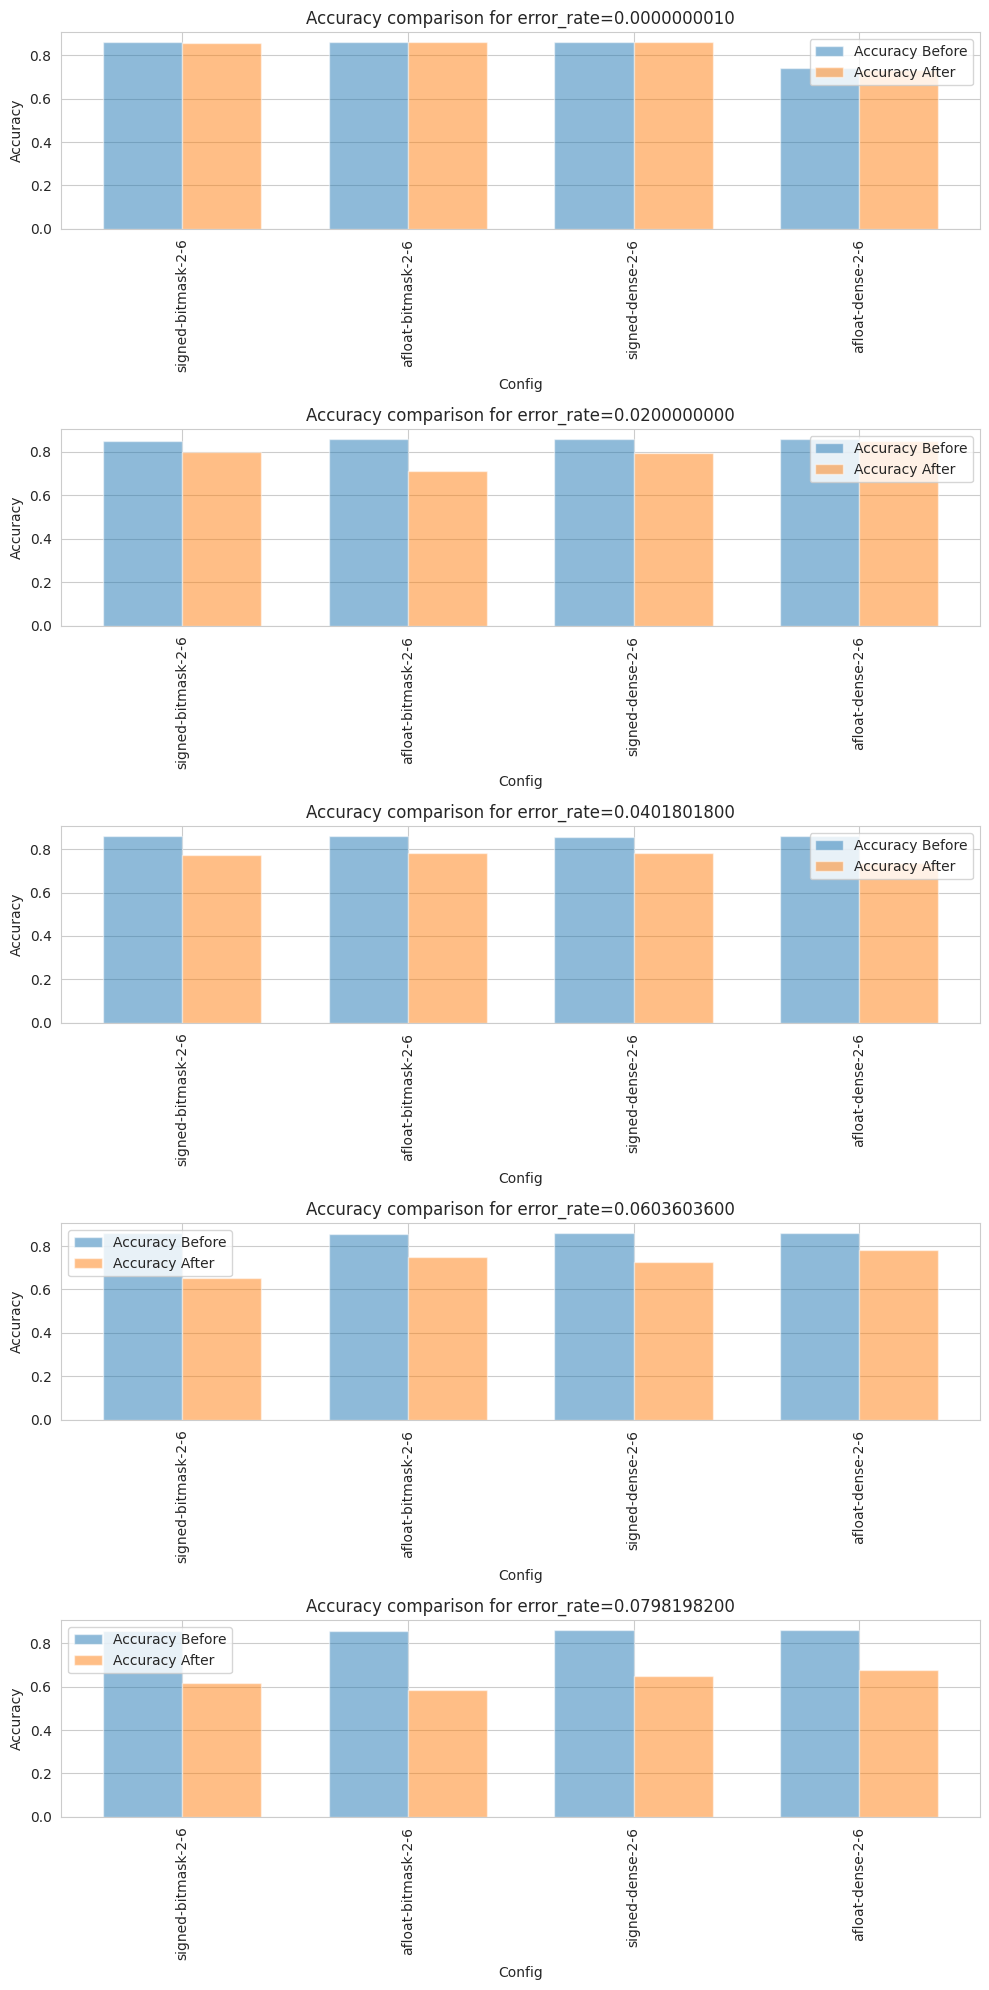

In [6]:
# Create the figure and the axes
fig, axs = plt.subplots(5, 1, figsize=(10, 20))

# For each selected error_rate
for i, (idx, row) in enumerate(selected_data.iterrows()):
    # Select the data for the current error_rate
    current_data = data[data['error_rate'] == row['error_rate']]

    # Create a bar chart to compare accuracy_before and accuracy_after of DNN with different settings
    bar_width = 0.35
    bar1 = np.arange(len(current_data))
    bar2 = [x + bar_width for x in bar1]

    axs[i].bar(bar1, current_data['accuracy_before'], width=bar_width, alpha=0.5, label='Accuracy Before')
    axs[i].bar(bar2, current_data['accuracy_after'], width=bar_width, alpha=0.5, label='Accuracy After')

    axs[i].set_title(f'Accuracy comparison for error_rate={row["error_rate"]:.10f}')
    axs[i].set_xlabel('Config')
    axs[i].set_ylabel('Accuracy')
    axs[i].set_xticks([r + bar_width / 2 for r in range(len(current_data))])
    axs[i].set_xticklabels(current_data['config'])
    axs[i].legend()
    axs[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

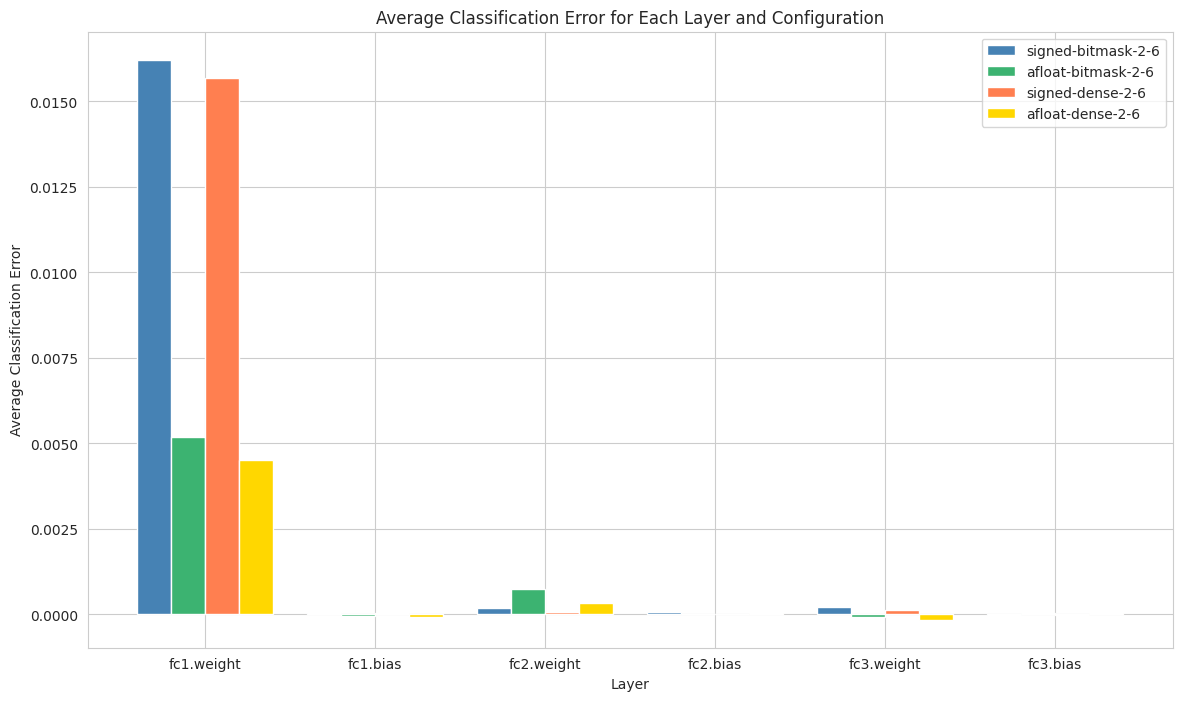

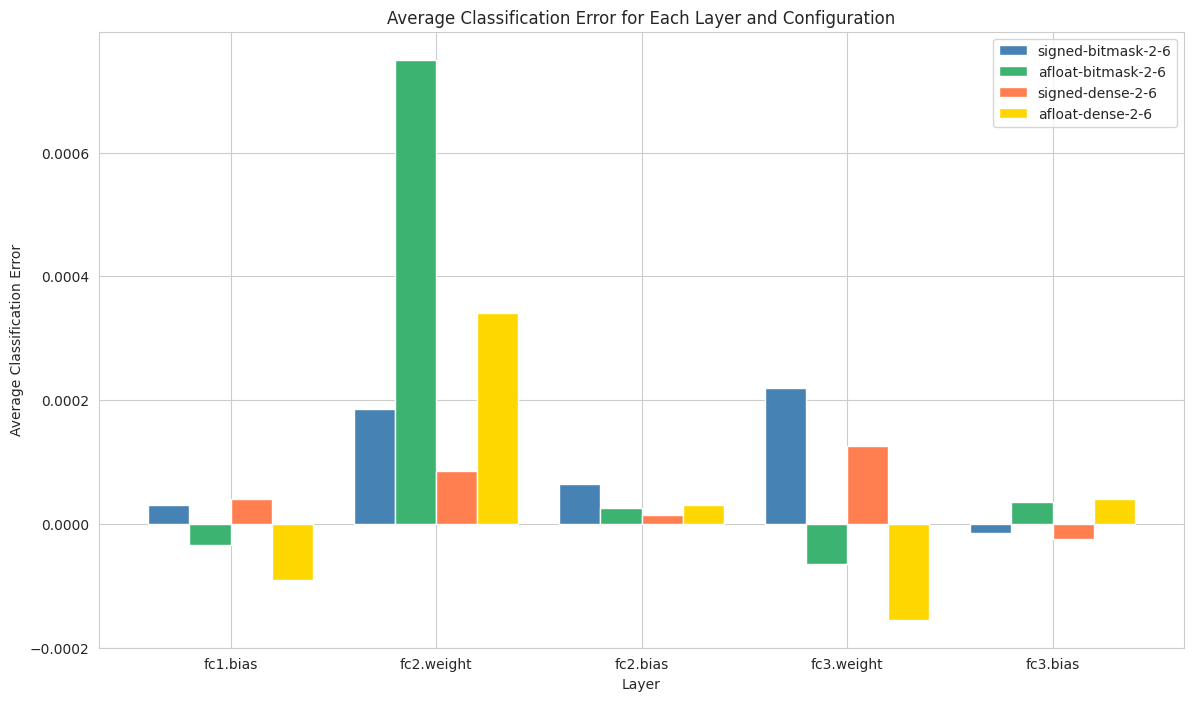

In [31]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON file
with open("layer_analysis_results.json", "r") as file:
    data = json.load(file)

# Create a function to generate a combined bar plot
def generate_combined_bar_plot(data, title, include_fc1=True):
    layers = list(data.keys())
    configs = list(data[layers[0]].keys())

    # Remove 'fc1.weight' if include_fc1 is False
    if not include_fc1 and 'fc1.weight' in layers:
        layers.remove('fc1.weight')

    # Create an array for the x locations of the groups
    ind = range(len(layers))

    # Create a list of colors for the different configurations
    colors = ['steelblue', 'mediumseagreen', 'coral', 'gold']

    # Set the width of the bars
    width = 0.2

    # Create the figure and the axes
    fig, ax = plt.subplots(figsize=(14, 8))

    # For each configuration, create a bar plot
    for i, config in enumerate(configs):
        errors = [data[layer][config]['classification_error_average'] for layer in layers]
        ax.bar([p + width*i for p in ind], errors, width, color=colors[i], label=config)

    # Set the x-ticks and the x-tick labels
    ax.set_xticks([p + width*(len(configs)-1)/2 for p in ind])
    ax.set_xticklabels(layers)

    # Set the title and the labels
    ax.set_title(title)
    ax.set_xlabel('Layer')
    ax.set_ylabel('Average Classification Error')

    # Add a legend
    ax.legend()

    plt.show()

# Generate the combined bar plot
generate_combined_bar_plot(data, 'Average Classification Error for Each Layer and Configuration')
generate_combined_bar_plot(data, 'Average Classification Error for Each Layer and Configuration', False)

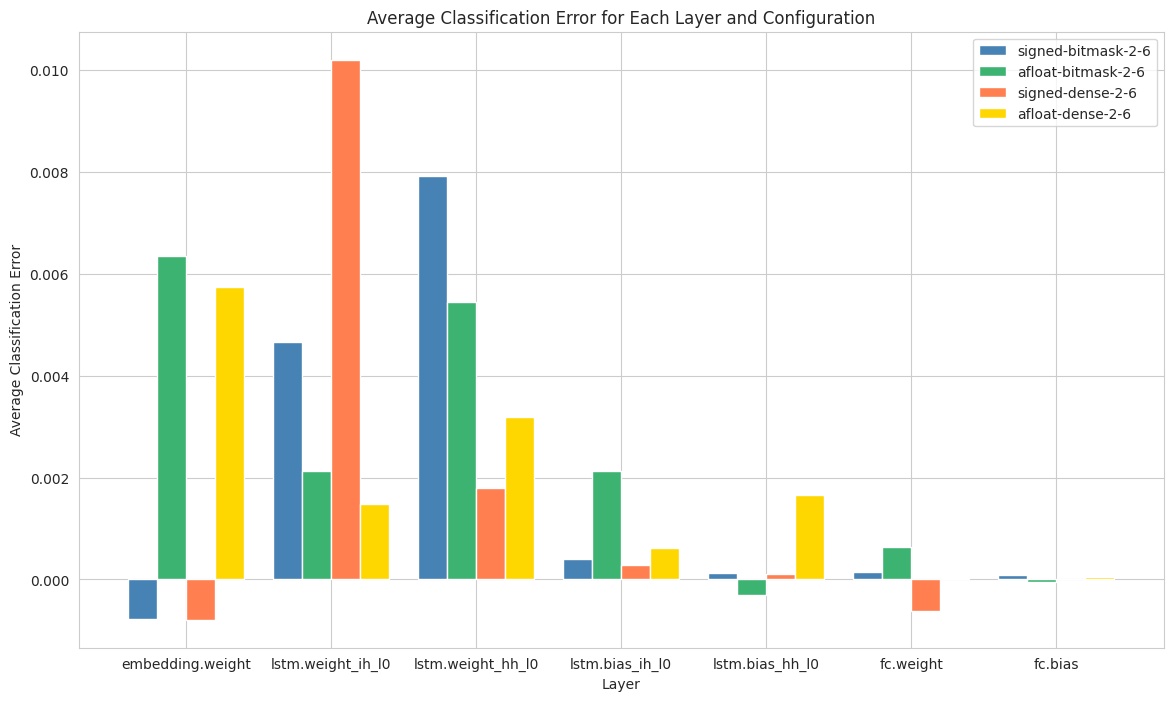

In [32]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON file
with open("LSTM_layer_analysis_results.json", "r") as file:
    data = json.load(file)

# Create a function to generate a combined bar plot
def generate_combined_bar_plot(data, title):
    layers = list(data.keys())
    configs = list(data[layers[0]].keys())

    # Create an array for the x locations of the groups
    ind = range(len(layers))

    # Create a list of colors for the different configurations
    colors = ['steelblue', 'mediumseagreen', 'coral', 'gold']

    # Set the width of the bars
    width = 0.2

    # Create the figure and the axes
    fig, ax = plt.subplots(figsize=(14, 8))

    # For each configuration, create a bar plot
    for i, config in enumerate(configs):
        errors = [data[layer][config]['classification_error_average'] for layer in layers]
        ax.bar([p + width*i for p in ind], errors, width, color=colors[i], label=config)

    # Set the x-ticks and the x-tick labels
    ax.set_xticks([p + width*(len(configs)-1)/2 for p in ind])
    ax.set_xticklabels(layers)

    # Set the title and the labels
    ax.set_title(title)
    ax.set_xlabel('Layer')
    ax.set_ylabel('Average Classification Error')

    # Add a legend
    ax.legend()

    plt.show()

# Generate the combined bar plot
generate_combined_bar_plot(data, 'Average Classification Error for Each Layer and Configuration')